In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [13]:
dat = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/master/iris.csv")
dat

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Name         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
dat.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


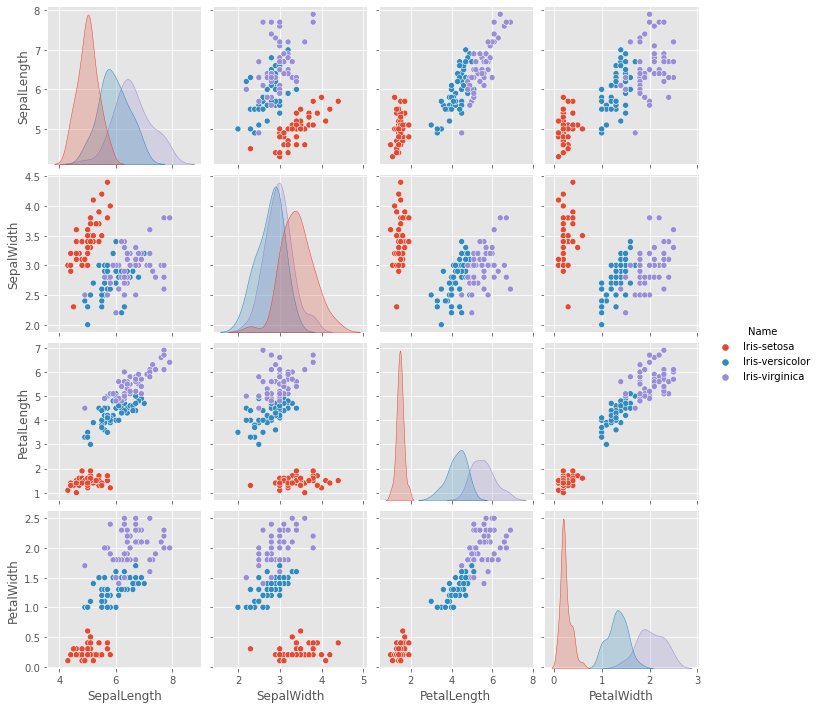

In [70]:
sns.pairplot(dat,hue="Name");

In [18]:
X = dat.iloc[:, [0,1,2, 3]].values
y = dat.iloc[:, 4].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [38]:
import numpy as np

y_pred = classifier.predict(X_test)
probs_y=classifier.predict_proba(X_test)
probs_y = np.round(probs_y, 2)

In [36]:
preds = pd.DataFrame(probs_y, columns=["setosa","versicolor","virginica"])
y_tests = pd.Series(y_test)

In [37]:
pd.concat([y_tests, preds],axis=1)

,0,setosa,versicolor,virginica
0,Iris-virginica,0.00,0.06,0.94
1,Iris-versicolor,0.01,0.96,0.03
2,Iris-setosa,0.98,0.02,0.00
3,Iris-virginica,0.00,0.02,0.98
4,Iris-setosa,0.97,0.03,0.00
5,Iris-virginica,0.00,0.01,0.99
6,Iris-setosa,0.98,0.02,0.00
7,Iris-versicolor,0.00,0.75,0.25
8,Iris-versicolor,0.00,0.74,0.26
9,Iris-versicolor,0.02,0.94,0.04


In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [65]:
from sklearn.metrics import r2_score
r2_score((y_test == "Iris-virginica").astype("int"), pd.DataFrame(probs_y)[2].values)

0.784943295019157